<p>The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.</p>

<p><strong>Attribute information</strong><br />
<br />
Invoice id: Computer generated sales slip invoice identification number<br />
<br />
Branch: Branch of supercenter (3 branches are available identified by A, B and C).<br />
<br />
City: Location of supercenters<br />
<br />
Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.<br />
<br />
Gender: Gender type of customer<br />
<br />
Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel<br />
<br />
Unit price: Price of each product in $<br />
<br />
Quantity: Number of products purchased by customer<br />
<br />
Tax: 5% tax fee for customer buying<br />
<br />
Total: Total price including tax<br />
<br />
Date: Date of purchase (Record available from January 2019 to March 2019)<br />
<br />
Time: Purchase time (10am to 9pm)<br />
<br />
Payment: Payment used by customer for purchase (3 methods are available &ndash; Cash, Credit card and Ewallet)<br />
<br />
COGS: Cost of goods sold<br />
<br />
Gross margin percentage: Gross margin percentage<br />
<br />
Gross income: Gross income<br />
<br />
Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)</p>


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = None
pd.options.display.max_columns = None
sns.set()

In [2]:
df = pd.read_csv("supermarket_sales - Sheet1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [3]:
df.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
564,514-37-2845,B,Mandalay,Normal,Male,Fashion accessories,99.25,2,9.93,208.43,3/20/2019,13:02,Cash,198.50,4.76,9.93,9.00
324,746-54-5508,A,Yangon,Normal,Male,Home and lifestyle,21.52,6,6.46,135.58,1/17/2019,12:48,Credit card,129.12,4.76,6.46,9.40
510,347-72-6115,B,Mandalay,Member,Female,Sports and travel,90.74,7,31.76,666.94,1/16/2019,18:03,Credit card,635.18,4.76,31.76,6.20
459,729-46-7422,C,Naypyitaw,Normal,Male,Food and beverages,35.89,1,1.79,37.68,2/23/2019,16:52,Credit card,35.89,4.76,1.79,7.90
938,131-70-8179,A,Yangon,Member,Female,Health and beauty,92.09,3,13.81,290.08,2/17/2019,16:27,Cash,276.27,4.76,13.81,4.20


In [4]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

## *Get unique Values from Categorical Columns*

In [5]:
cols = ['Branch','City','Customer type','Gender','Product line','Payment']

In [6]:
for col in cols:
    print(f"{col} Unique Values = {df[col].unique()}")
    print("**************************")

Branch Unique Values = ['A' 'C' 'B']
**************************
City Unique Values = ['Yangon' 'Naypyitaw' 'Mandalay']
**************************
Customer type Unique Values = ['Member' 'Normal']
**************************
Gender Unique Values = ['Female' 'Male']
**************************
Product line Unique Values = ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
**************************
Payment Unique Values = ['Ewallet' 'Cash' 'Credit card']
**************************


### *Change Data Type for columns `(Date , Time)` from Object to Date*

In [7]:
df.Date = pd.to_datetime(df.Date)
df.Time = pd.to_datetime(df.Time)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

C:\Users\omar\AppData\Local\Temp\ipykernel_28584\1997783026.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.Time = pd.to_datetime(df.Time)


## *Changing the column names makes all letters lowercase*

In [8]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.strip()

In [9]:
df.sort_values(by='invoice id').head(10)

,invoice id,branch,city,customer type,gender,product line,unit price,quantity,tax 5%,total,date,time,payment,cogs,gross margin percentage,gross income,rating
162,101-17-6199,A,Yangon,Normal,Male,Food and beverages,45.79,7,16.03,336.56,2019-03-13,2024-05-24 19:44:00,Credit card,320.53,4.76,16.03,7.00
867,101-81-4070,C,Naypyitaw,Member,Female,Health and beauty,62.82,2,6.28,131.92,2019-01-17,2024-05-24 12:36:00,Ewallet,125.64,4.76,6.28,4.90
778,102-06-2002,C,Naypyitaw,Member,Male,Sports and travel,25.25,5,6.31,132.56,2019-03-20,2024-05-24 17:52:00,Cash,126.25,4.76,6.31,6.10
776,102-77-2261,C,Naypyitaw,Member,Male,Health and beauty,65.31,7,22.86,480.03,2019-03-05,2024-05-24 18:02:00,Credit card,457.17,4.76,22.86,4.20
683,105-10-6182,A,Yangon,Member,Male,Fashion accessories,21.48,2,2.15,45.11,2019-02-27,2024-05-24 12:22:00,Ewallet,42.96,4.76,2.15,6.60
169,105-31-1824,A,Yangon,Member,Male,Sports and travel,69.52,7,24.33,510.97,2019-02-01,2024-05-24 15:10:00,Credit card,486.64,4.76,24.33,8.50
56,106-35-6779,A,Yangon,Member,Male,Home and lifestyle,44.34,2,4.43,93.11,2019-03-27,2024-05-24 11:26:00,Cash,88.68,4.76,4.43,5.80
67,109-28-2512,B,Mandalay,Member,Female,Fashion accessories,97.61,6,29.28,614.94,2019-01-07,2024-05-24 15:01:00,Ewallet,585.66,4.76,29.28,9.90
824,109-86-4363,B,Mandalay,Member,Female,Sports and travel,60.08,7,21.03,441.59,2019-02-14,2024-05-24 11:36:00,Credit card,420.56,4.76,21.03,4.50
400,110-05-6330,C,Naypyitaw,Normal,Female,Food and beverages,39.43,6,11.83,248.41,2019-03-25,2024-05-24 20:18:00,Credit card,236.58,4.76,11.83,9.40


# *Univariate Analysis*

In [10]:
for col in df.iloc[:,1:].select_dtypes('object'):
    print("{}: ".format(col),df[col].unique())

branch:  ['A' 'C' 'B']
city:  ['Yangon' 'Naypyitaw' 'Mandalay']
customer type:  ['Member' 'Normal']
gender:  ['Female' 'Male']
product line:  ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
payment:  ['Ewallet' 'Cash' 'Credit card']


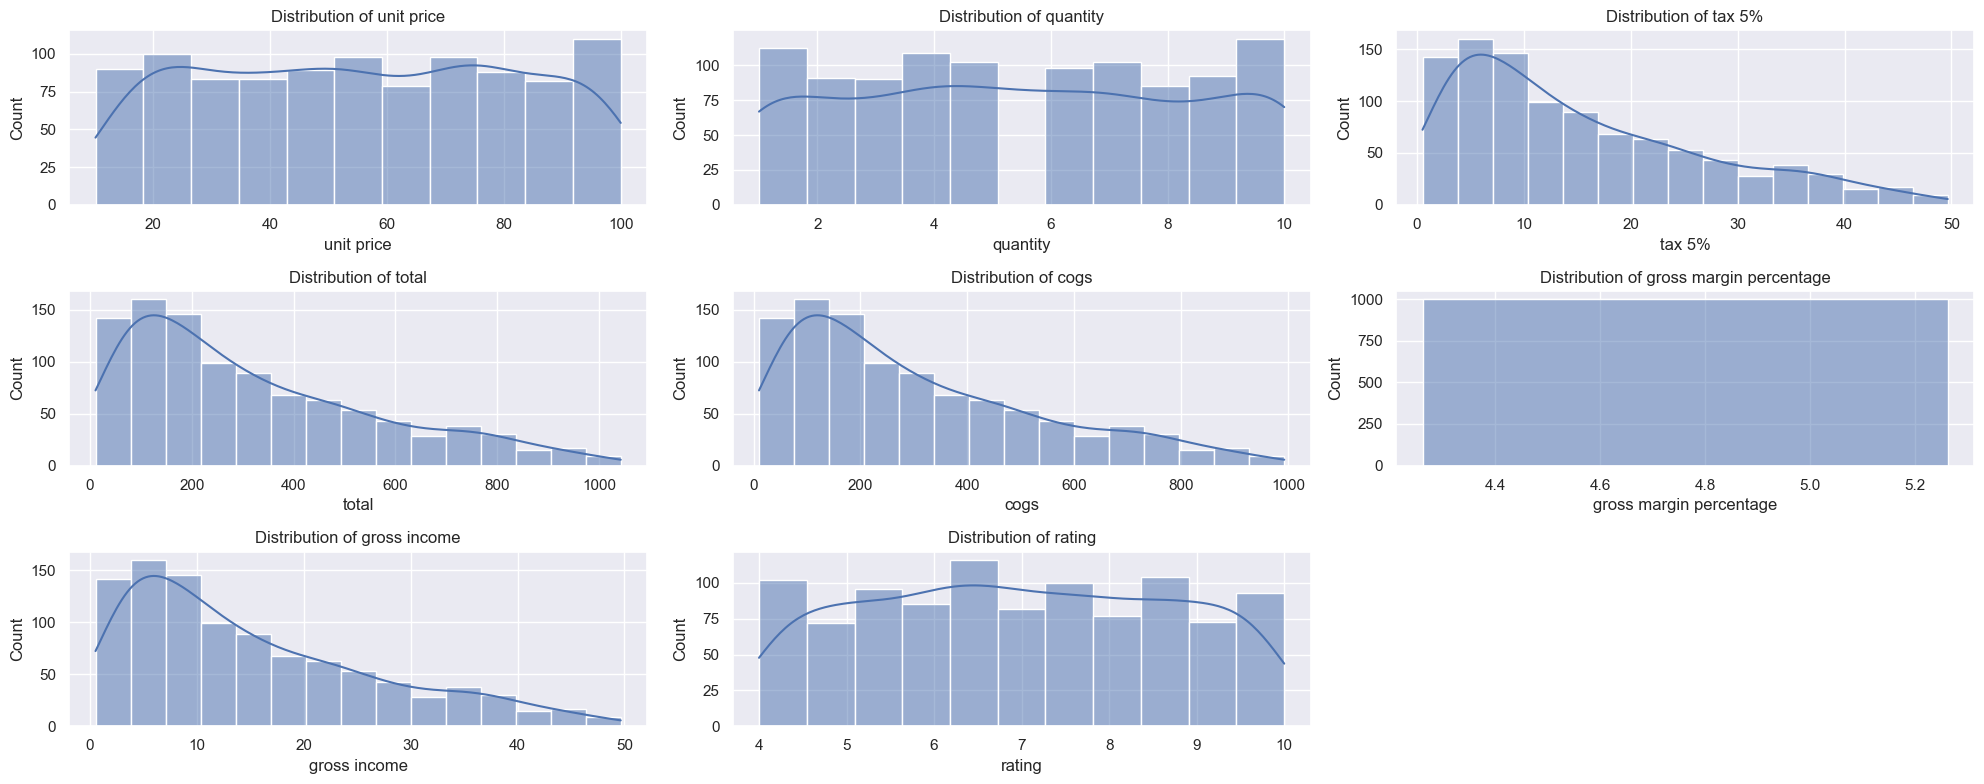

In [11]:
n_cols = df.select_dtypes('number')
plt.figure(figsize=(20,8))
for e,i in enumerate(n_cols.columns):
    plt.subplot(3,3,e+1)
    sns.histplot(n_cols[i],kde=True)
    plt.title("Distribution of "+i)
    plt.tight_layout()

In [12]:
df.select_dtypes('number').describe().T

,count,mean,std,min,25%,50%,75%,max
unit price,"1,000.00",55.67,26.49,10.08,32.88,55.23,77.94,99.96
quantity,"1,000.00",5.51,2.92,1.00,3.00,5.00,8.00,10.00
tax 5%,"1,000.00",15.38,11.71,0.51,5.92,12.09,22.45,49.65
total,"1,000.00",322.97,245.89,10.68,124.42,253.85,471.35,"1,042.65"
cogs,"1,000.00",307.59,234.18,10.17,118.50,241.76,448.91,993.00
gross margin percentage,"1,000.00",4.76,0.00,4.76,4.76,4.76,4.76,4.76
gross income,"1,000.00",15.38,11.71,0.51,5.92,12.09,22.45,49.65
rating,"1,000.00",6.97,1.72,4.00,5.50,7.00,8.50,10.00


C:\Users\omar\AppData\Local\Temp\ipykernel_28584\524265544.py:14: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.countplot(data=s_cols, x=i,palette=color_palette, hue=i)
C:\Users\omar\AppData\Local\Temp\ipykernel_28584\524265544.py:14: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.countplot(data=s_cols, x=i,palette=color_palette, hue=i)
C:\Users\omar\AppData\Local\Temp\ipykernel_28584\524265544.py:14: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(data=s_cols, x=i,palette=color_palette, hue=i)
C:\Users\omar\AppData\Local\Temp\ipykernel_28584\524265544.py:14: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(data=s_cols, x=i,palette=color_palette, hue=i)
C:\Users\omar\AppData\Local\Temp\ipykernel_28584\524265544.py:14: UserWarning: The palette list has more val

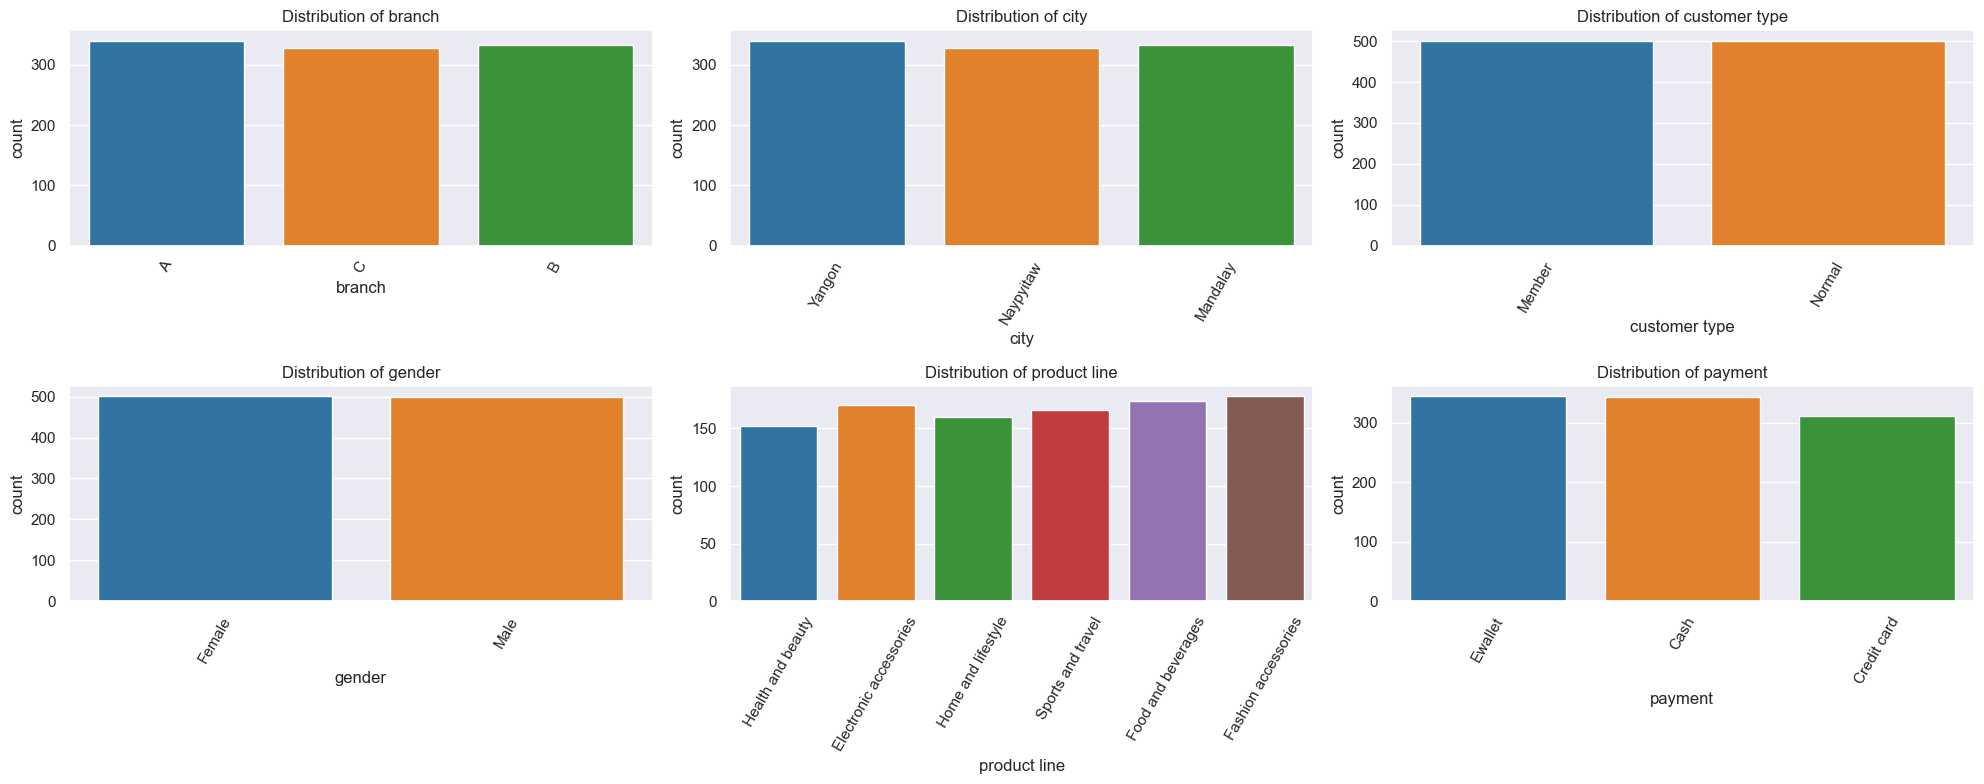

In [13]:
# Select only object (categorical) columns
s_cols = df.select_dtypes('object')
s_cols = s_cols.iloc[:,1:]

# Create a custom color palette with distinct colors
n_categories = len(s_cols.columns)
color_palette = sns.color_palette("tab10", n_colors=n_categories)


# Create subplots
plt.figure(figsize=(20,8))
for e,i in enumerate(s_cols.columns):
    plt.subplot(2,3,e+1)
    sns.countplot(data=s_cols, x=i,palette=color_palette, hue=i)
    plt.title("Distribution of "+i)
    plt.xticks(rotation=60)
    plt.tight_layout()

# *Bivariate Analysis*
### 1- How many M/F in each Branch
### 2- Branch VS.Total

In [14]:
grouping = df.groupby(['branch','gender'], as_index=False)['total'].count()
grouping

,branch,gender,total
0,A,Female,161
1,A,Male,179
2,B,Female,162
3,B,Male,170
4,C,Female,178
5,C,Male,150


In [15]:
px.bar(data_frame=grouping,x='gender',y='total',color='branch',title='Number of M/F in each Branch')

### We notice that the number of men is greater than women expect Branch 'C', so it is intersting if we can study further why.

In [16]:
grouping = df[['branch','total','date']]
# grouping = grouping.set_index('date')
grouping = grouping.groupby(['date','branch'],as_index=False)['total'].sum()

grouping = grouping.pivot(index='date', columns='branch',values='total')
#grouping.plot(figsize=(15,8))
px.line(data_frame=grouping)

### We need to observe `the count of invoices`, therefore we need to `Normalize` the total to start 1, to do this we will *devid the total of each column by day One.*

### $$Norm = df/df.iloc[0,:]$$

In [17]:
# Before Normalization 
grouping.head()

branch,A,B,C
date,,,
2019-01-01,"2,371.32","1,536.70",837.16
2019-01-02,307.05,"1,162.80",475.65
2019-01-03,937.41,"1,016.69",124.03
2019-01-04,483.26,510.58,629.84
2019-01-05,"2,024.51",486.76,"1,025.42"


In [18]:
#get first row
grouping.iloc[0,:]

branch
A   2,371.32
B   1,536.70
C     837.16
Name: 2019-01-01 00:00:00, dtype: float64

In [19]:
# After Normalization
norm  = grouping/grouping.iloc[0,:]
norm.head()

branch,A,B,C
date,,,
2019-01-01,1.00,1.00,1.00
2019-01-02,0.13,0.76,0.57
2019-01-03,0.40,0.66,0.15
2019-01-04,0.20,0.33,0.75
2019-01-05,0.85,0.32,1.22


In [20]:
px.line(data_frame=norm,title='The Sales Movement in each branch')

## *Now we can Say the most branch Make big Sales Movement in All Time is `branch C` and then `branch B` and then `branch A`*
### It is calear that the branch 'A' has less sales Movement than the other, we need more data to investigate why.  

In [21]:
grouping = df.groupby('branch')['total'].sum()
px.pie(data_frame=grouping, names=grouping.index, values='total' ,title='Total amount of all invoices in each branch')

# *Multivariate Analysis*
* ### Rating of M/F in each Branch

In [22]:
grouping = df[['branch','gender','rating']]

In [23]:
grouping = grouping.groupby(['branch','gender'],as_index=False)['rating'].mean()
grouping

,branch,gender,rating
0,A,Female,6.84
1,A,Male,7.20
2,B,Female,6.88
3,B,Male,6.76
4,C,Female,7.16
5,C,Male,6.97


In [24]:
px.bar(data_frame=grouping, x='branch',y='rating',color='gender')

In [25]:
px.scatter(data_frame=grouping,x='branch',y='rating',color='gender')

## *Rating of M/F in each Branch for each Month*

In [26]:
grouping = df[['branch','gender','date','rating']]

In [27]:
grouping.date = grouping.date.dt.to_period('M')

C:\Users\omar\AppData\Local\Temp\ipykernel_28584\1376461319.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
grouping = grouping.groupby(['branch','gender','date'],as_index=False)['rating'].mean()
grouping.head()

,branch,gender,date,rating
0,A,Female,2019-01,7.06
1,A,Female,2019-02,6.64
2,A,Female,2019-03,6.81
3,A,Male,2019-01,7.09
4,A,Male,2019-02,7.39


In [29]:
grouping.date =grouping.date.astype('datetime64[ns]')

In [30]:
px.bar(data_frame=grouping, x='date',y='rating',color='branch', facet_col="gender",
             category_orders={"gender": ['Male','Female']})

In [31]:
px.scatter(data_frame=grouping, x='date',y='rating',color='branch', facet_col="gender",
             category_orders={"gender": ['Male','Female']})